<a href="https://colab.research.google.com/github/SoheilBadri2000/DataScience2/blob/main/04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/amir-saniyan/HodaDatasetReader.git

Cloning into 'HodaDatasetReader'...
remote: Enumerating objects: 24, done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 24
Receiving objects: 100% (24/24), 6.34 MiB | 16.32 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [14]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from HodaDatasetReader.HodaDatasetReader import read_hoda_dataset
from time import perf_counter

In [3]:
X_train, y_train = read_hoda_dataset("/content/HodaDatasetReader/DigitDB/Train 60000.cdb")
X_test, y_test = read_hoda_dataset("/content/HodaDatasetReader/DigitDB/Test 20000.cdb")

In [5]:
X_train.shape

(60000, 1024)

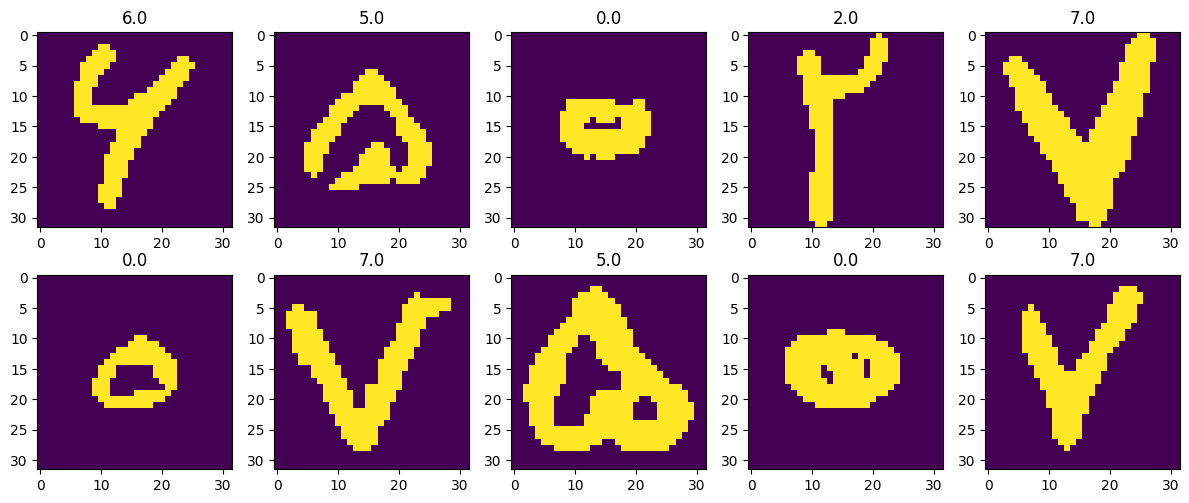

In [8]:
plt.figure(figsize=(12,5))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(X_train[i].reshape(32,32))
  plt.title(y_train[i])

plt.tight_layout()
plt.show()

In [21]:
tr_time_start = perf_counter()

hoda_svc = SVC(kernel="linear", C=100)
# C represents margin(soft|hard): High C -> hard margin | low C-> soft margin
hoda_svc.fit(X_train[:20000], y_train[:20000])

tr_time_end = perf_counter()
print(f"train acc: {hoda_svc.score(X_train, y_train)}")
print(f"time span training phase: {tr_time_end - tr_time_start}")

train acc: 0.9746666666666667
time span training phase: 47.90926867500002


In [20]:
tr_time_start = perf_counter()

test_score = hoda_svc.score(X_test, y_test)

tr_time_end = perf_counter()
print(f"test acc: {test_score}")
print(f"time span test phase: {tr_time_end - tr_time_start}")

test acc: 0.93155
time span test phase: 71.44555140000011


In [22]:
for c in [0.01, 1, 100]:
  for k in ["linear", "rbf"]:
    tr_time_start = perf_counter()
    hoda_svc_exp = SVC(kernel=k, C=c)
    hoda_svc_exp.fit(X_train[:20000], y_train[:20000])
    tr_time_end = perf_counter()
    print(f"\n\nKernel: {k}, C: {c}\n")
    print(f"train acc: {hoda_svc_exp.score(X_train, y_train)}")
    print(f"time span training phase: {tr_time_end - tr_time_start}")
    tr_time_start = perf_counter()
    test_score = hoda_svc.score(X_test, y_test)
    tr_time_end = perf_counter()
    print(f"test acc: {test_score}")
    print(f"time span test phase: {tr_time_end - tr_time_start}")



Kernel: linear, C: 0.01

train acc: 0.9745333333333334
time span training phase: 34.954341366000335
test acc: 0.93155
time span test phase: 62.89056019000009


Kernel: rbf, C: 0.01

train acc: 0.9137666666666666
time span training phase: 387.1738838590004
test acc: 0.93155
time span test phase: 63.19737749900014


Kernel: linear, C: 1

train acc: 0.97465
time span training phase: 36.04323922000003
test acc: 0.93155
time span test phase: 62.62058779800009


Kernel: rbf, C: 1

train acc: 0.9874666666666667
time span training phase: 68.09932901600041
test acc: 0.93155
time span test phase: 61.51273381200008


Kernel: linear, C: 100

train acc: 0.9746666666666667
time span training phase: 35.20698802300012
test acc: 0.93155
time span test phase: 59.26395800700084


Kernel: rbf, C: 100

train acc: 0.9914
time span training phase: 65.24405355300041
test acc: 0.93155
time span test phase: 57.61149730099987
